## Authorship & Copyright

**Author:** Maggie O'Shea

**Script Information** 
  - filename: MAE_plot_cleancode.ipynb
  - Written on Python 2.7.14

**Copyright**
  - Copyright by the author
  - distributed under the GNU general public license: https://www.gnu.org/licenses/gpl.html
  - no warranty (see license details at the link above)

Written for Course: Bayesian Statistical Modeling & Computation with Professor Klaus Keller at Dartmouth College
Final Project

contact: margaret.oshea.gr@dartmouth.edu

### Purpose 
The purpose of this script is just to plot the mean absolute error (MAE) relative to the number of stations included in the Tx5d estimate. 

The MAE was calculated in a previous analysis, the work of which is not published. The resulting estimate is the Mean Absolute Error in the measurement of Tx5d based on the number of stations included in the estimate. 

### Import Packages

In [7]:
import pandas as pd
import numpy as np
import xarray as xr
import os
import itertools
import random

# interactive plotting stuff 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap

from scipy.stats import linregress

### Set Working Directory

In [8]:
os.chdir("/dartfs-hpc/rc/lab/C/CMIG/moshea/Projects/DataPoverty")

# set export directory (where to export figures)
export_dir = "/dartfs-hpc/rc/lab/C/CMIG/moshea/Projects/BayesianStats_FinalProject/figures/"

### Import Data

In [9]:
forecast_accuracy_results_df = pd.read_csv("./simulated_region/data/processed/accuracymetricresults1to99stations_v1.csv")

In [10]:
forecast_accuracy_results_df[forecast_accuracy_results_df.number_of_stations==2]

,Unnamed: 0,number_of_stations,RMSE,MSE,MAE,MdAE,MAPE,MdAPE,MBE,rmsre,r2
1,1,2,6.544222,42.826837,5.261679,5.049917,19.165107,14.818684,0.353999,0.204386,0.639892


### Plot just MAE

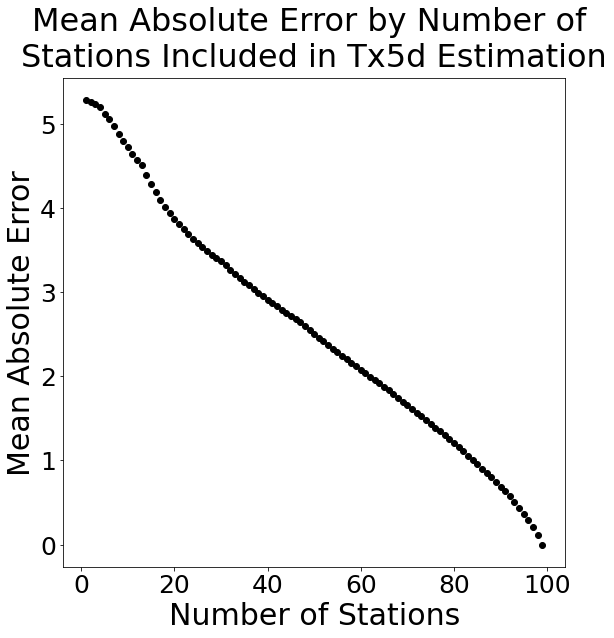

In [11]:
df_sorted = forecast_accuracy_results_df.sort_values(by=['number_of_stations'])
plt.figure(figsize=(9, 9))


x = df_sorted['number_of_stations']  
y = df_sorted['MAE']
plt.scatter(
    x,
    y,
    color='black')
#plt.axhline(y=0, color='lightgrey', linestyle='-')
plt.title('Mean Absolute Error by Number of \nStations Included in Tx5d Estimation', fontsize=32, pad=11)
plt.xlabel('Number of Stations', fontsize=30)
plt.ylabel('Mean Absolute Error', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.savefig(f"{export_dir}/MAE_number_of_stations.png", dpi=400)
plt.show()